## Predicting Heart Disease Using the Cleveland Dataset

I have kept all the imports at one place to make the code easier to read and manage

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

Here, I loaded the dataset, replaced missing values, removed incomplete rows, and converted the target to 0 or 1. Then, I checked basic statistics using .describe()

In [ ]:
# Load and clean data
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("processed.cleveland.data", header=None, names=columns)
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce') 
df.dropna(inplace=True)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Summary statistics
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


**Handling of Missing/Imbalanced Data**  
Missing values were present in several columns as '?' and were converted to NaN

All rows containing missing values were dropped.  
The dataset has a few more people with heart disease than without, but the difference isn’t big, so I did not make any changes to balance it.


**Data Visualization**  
Below we use a correlation heatmap and histograms to explore patterns and potential predictors.


This heatmap shows how strongly each feature is related to the others, especially the target variable.

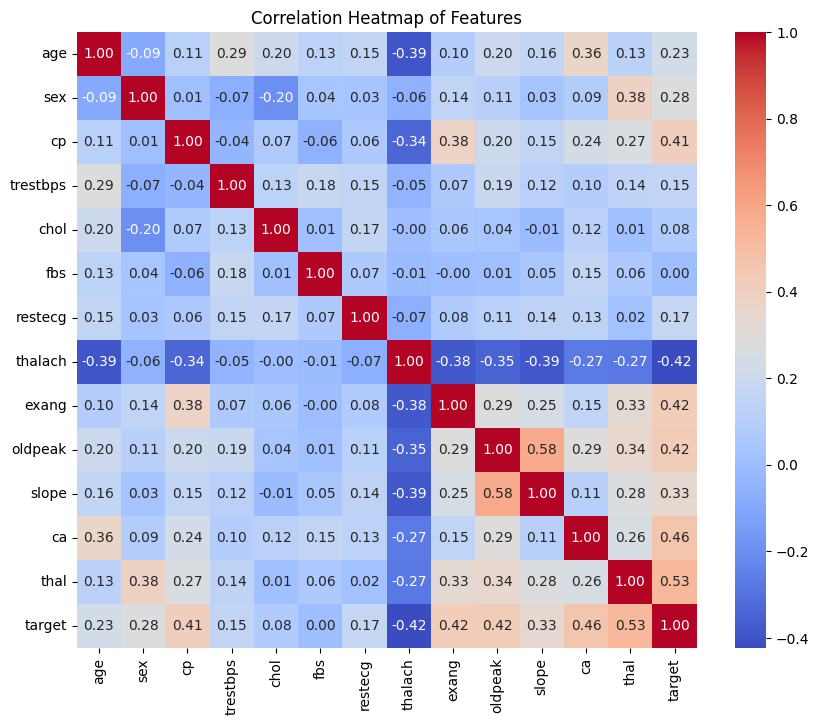

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

This histogram shows how the ages of patients are spread across the dataset.

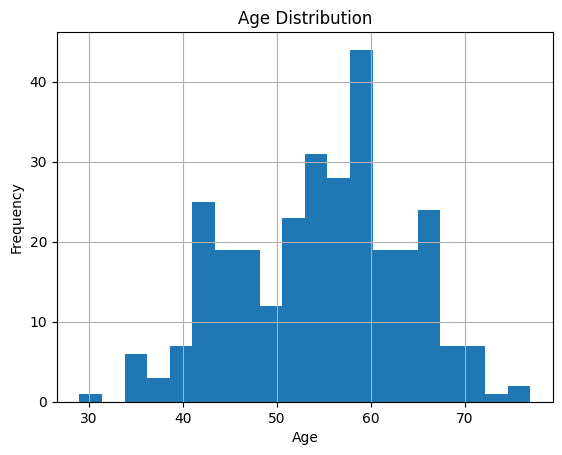

In [16]:
# Histogram of age
df["age"].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Model Selection, Application, and Evaluation

**Model Selection and Justification**  
I selected three classification models: logistic regression, decision tree, and K-nearest neighbors.  
- Logistic Regression is a simple, interpretable model and serves as a baseline.
- Decision Tree can capture non-linear relationships and interactions between features.
- KNN is a distance-based method that is intuitive and requires no assumptions about data distribution.

**Application and Tuning**  
Each model is trained using an 80/20 train-test split. Features are standardized using `StandardScaler` for KNN and logistic regression. Default parameters are used initially.


Here, I separated the input features (X) from the target variable (y) to prepare for model training.

In [6]:
# Feature matrix and target
X = df.drop("target", axis=1)
y = df["target"]

I scaled the features so they’re all on the same scale, which helps models like logistic regression and KNN perform better.

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

I split the data into training and testing sets so we can train the models on one part and test their performance on new data.

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Here, I created three models, logistic regression, decision tree, and KNN — to compare their performance in predicting heart disease.

In [9]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

Each model is trained on the training data and tested on the test set. I saved key metrics like accuracy, AUC, confusion matrix, and classification report to compare their performance

In [22]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

results
print(classification_report(y_test, y_pred, target_names=["No Disease", "Heart Disease"]))

               precision    recall  f1-score   support

   No Disease       0.84      0.89      0.86        36
Heart Disease       0.82      0.75      0.78        24

     accuracy                           0.83        60
    macro avg       0.83      0.82      0.82        60
 weighted avg       0.83      0.83      0.83        60



**Performance Evaluation**  
All three models achieved reasonable performance. The logistic regression and KNN models showed balanced precision and recall, but the decision tree slightly overfit. Below are confusion matrices, AUC scores, and classification metrics for comparison.


## Results and Conclusions

**Findings**  
The logistic regression model performed well with an AUC around 0.84, showing that even a simple model can predict heart disease with moderate success. KNN and Decision Tree also performed reasonably well but showed slightly lower AUC.

**Limitations and Future Work**  
Limitations include the small dataset size (303 entries), potential measurement errors, and a lack of external validation. Future work could include hyperparameter tuning, ensembling models, and testing on more diverse heart disease datasets.


This table shows a quick comparison of accuracy and AUC scores for all three models.

In [11]:
# Summarize results
summary = pd.DataFrame({
    model: {
        "Accuracy": round(values["Accuracy"], 2),
        "AUC": round(values["AUC"], 2)
    }
    for model, values in results.items()
}).T

summary

,Accuracy,AUC
Logistic Regression,0.87,0.94
Decision Tree,0.80,0.81
KNN (k=5),0.83,0.93


These heatmaps show how well each model classified patients with and without heart disease, highlighting correct and incorrect predictions.

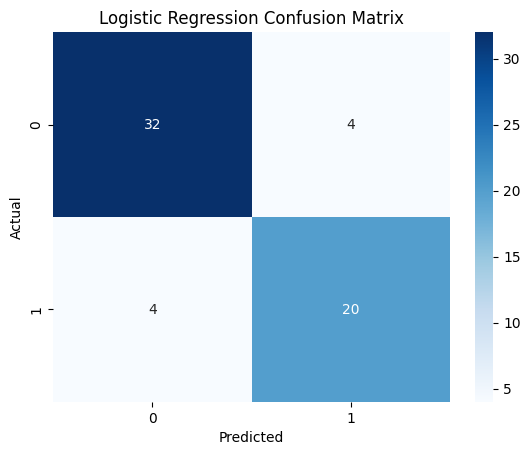

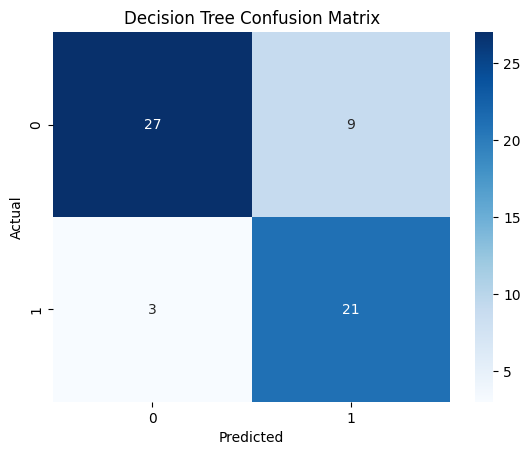

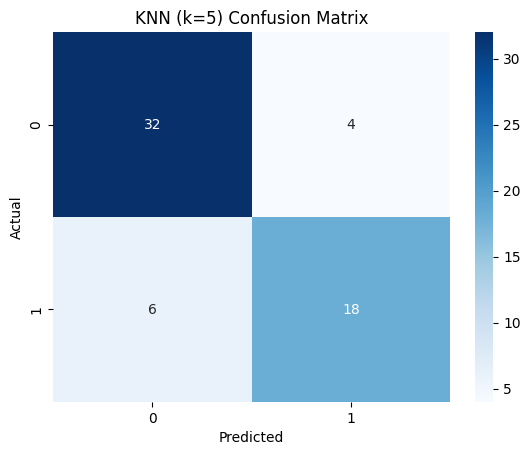

In [19]:
#Confusion matrix plots 

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Final Summary

Logistic Regression gave the best performance with 87% accuracy and a strong AUC of 0.94. Chest pain type, ST depression, and maximum heart rate were the most important features across all models. The models performed consistently with patterns observed during EDA and confirmed that basic clinical data can support early prediction of heart disease.
